In [2]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_merge = pd.read_csv('df_merged.csv')

In [4]:
strain=['AKR_J','A_J','C3H_HeJ','CBA_J','DBA_2J','LP_J']

In [5]:
df_sum1 = pd.read_csv('df_sum1.csv')

# S1

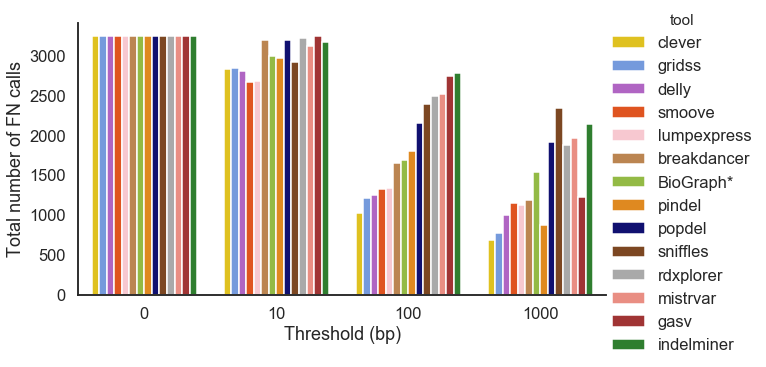

In [6]:
#tool order arranged based on 100 bp threshold (increasing)

%store -r
figs1a=sns.set_style("white")
figs1a=sns.set_context("talk")

fig_order=['clever','gridss','delly','smoove','lumpexpress','breakdancer','BioGraph*','pindel','popdel','sniffles','rdxplorer','mistrvar','gasv','indelminer']
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

figs1a = sns.catplot(x="threshold", y="nFN", kind="bar",data = df_sum1,hue="tool",aspect=1.8, palette=pal,hue_order=fig_order)
figs1a.set(xlabel='Threshold (bp)', ylabel='Total number of FN calls')
figs1a=sns.despine()
plt.xticks(rotation=0)
#plt.show(figs1a)
plt.savefig("../figures/supplementary/mouse/FN.png")
plt.savefig("../figures/supplementary/mouse/FN.pdf", bbox_inches='tight')

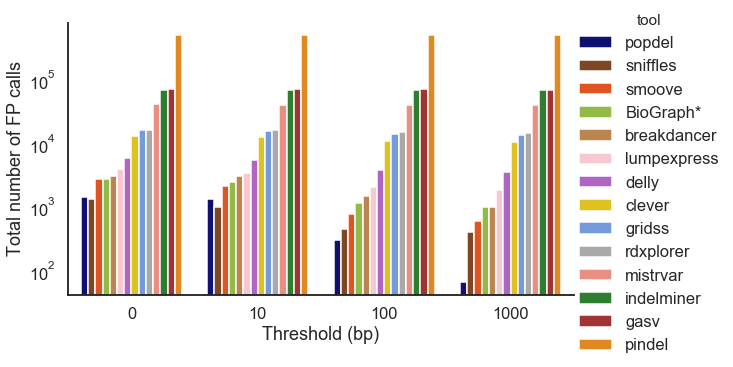

In [7]:
figs1b=sns.set_style("white")
figs1b=sns.set_context("talk")

fig_order = ['popdel','sniffles','smoove','BioGraph*','breakdancer','lumpexpress','delly','clever','gridss','rdxplorer','mistrvar','indelminer','gasv','pindel']
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

figs1b = sns.catplot(x="threshold", y="nFP", kind="bar",data = df_sum1,hue='tool',aspect=1.8, palette=pal,hue_order=fig_order)
figs1b.set(xlabel='Threshold (bp)', ylabel='Total number of FP calls')
figs1b.set(yscale="log");
figs1b=sns.despine()
#plt.show(figs1b)
plt.savefig("../figures/supplementary/mouse/FP.png")
plt.savefig("../figures/supplementary/mouse/FP.pdf", bbox_inches='tight')

# S2 - F-score

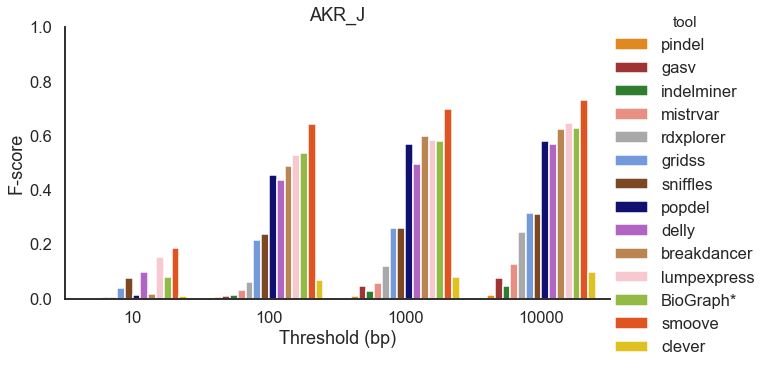

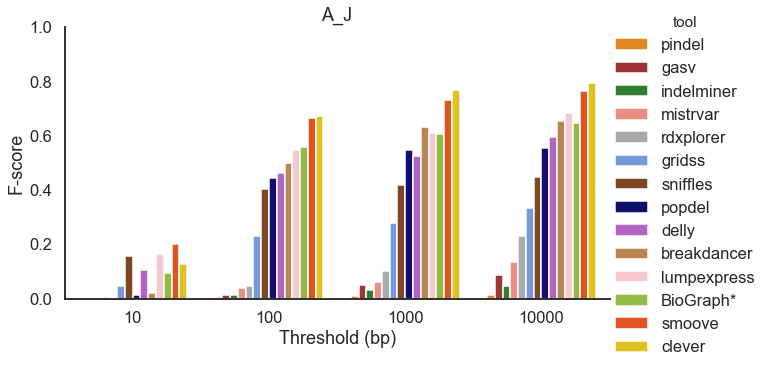

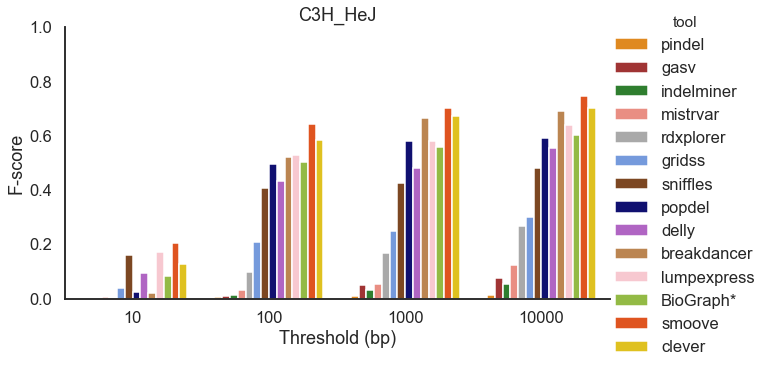

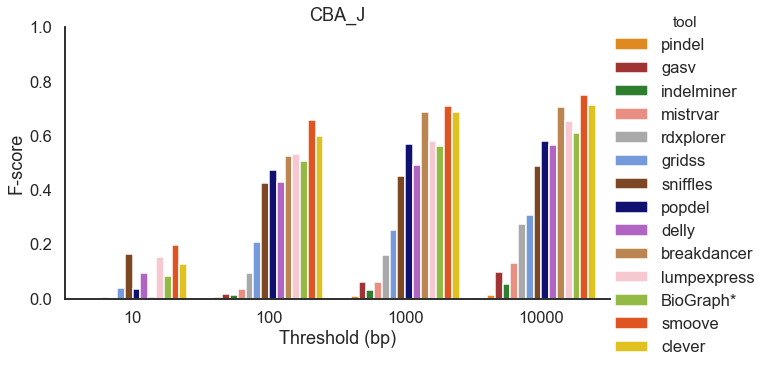

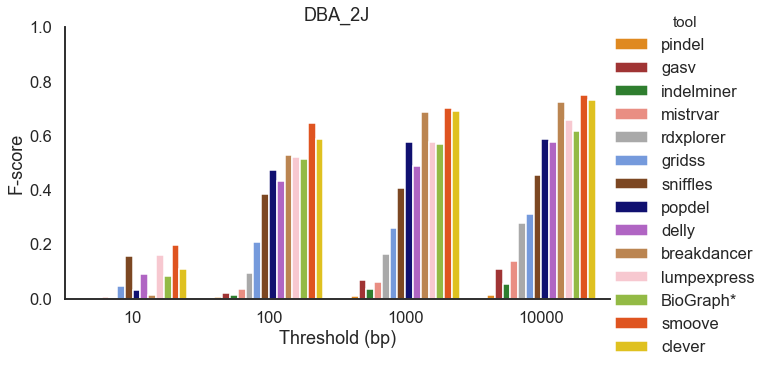

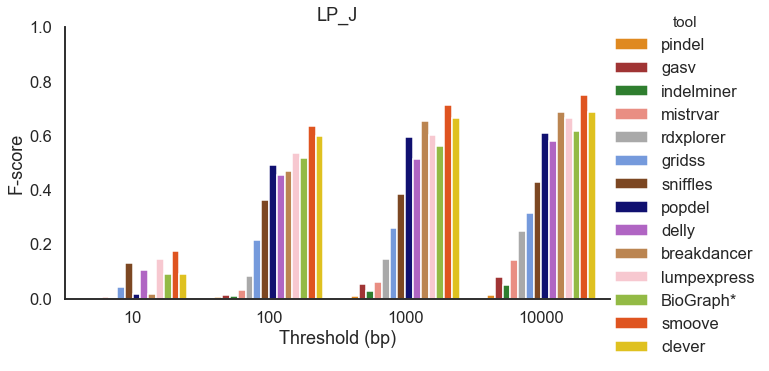

In [8]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['pindel','gasv','indelminer','mistrvar','rdxplorer','gridss','sniffles','popdel','delly','breakdancer','lumpexpress','BioGraph*','smoove','clever']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="f-score", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='tool',aspect=1.8,palette=pal,hue_order=fig_order)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='F-score')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/F-score_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/F-score_"+s+".pdf", bbox_inches='tight')

# S3 - Precision

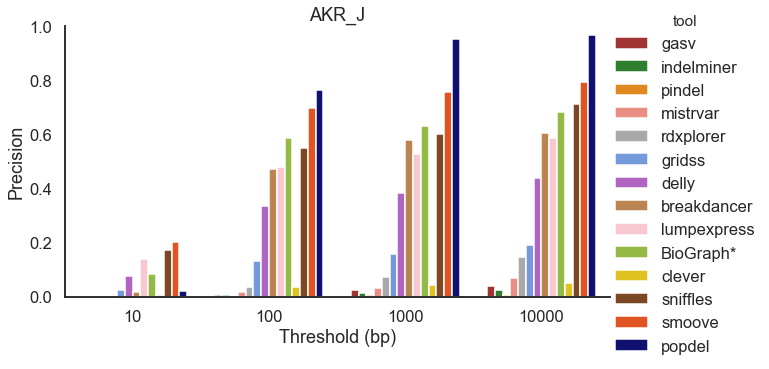

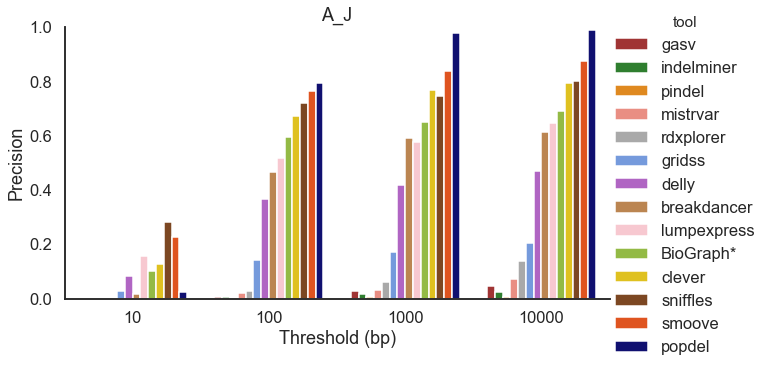

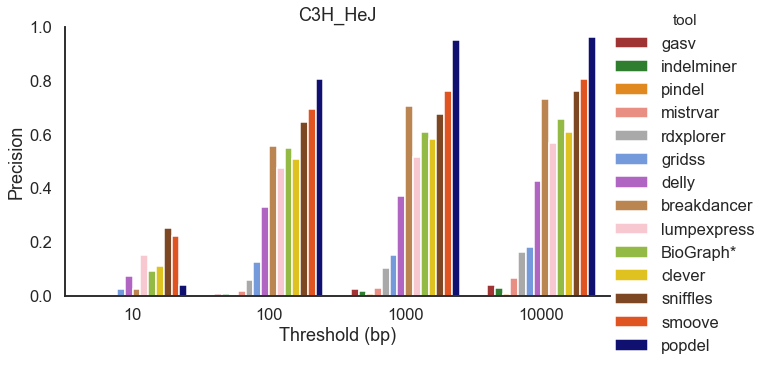

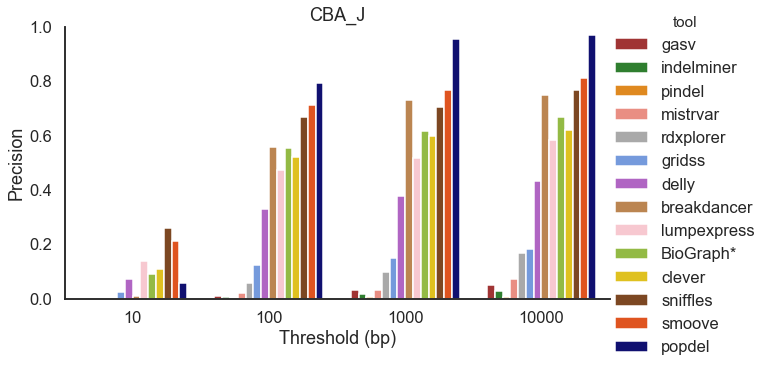

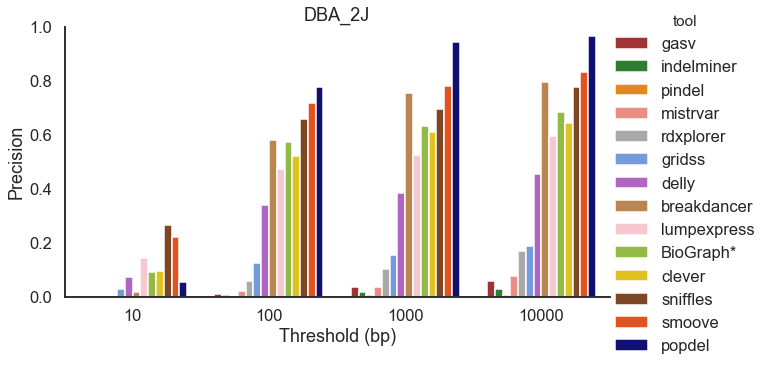

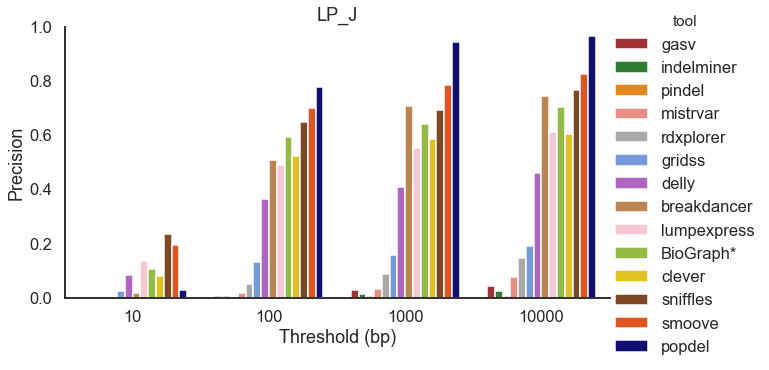

In [9]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['gasv','indelminer','pindel','mistrvar','rdxplorer','gridss','delly','breakdancer','lumpexpress','BioGraph*','clever','sniffles','smoove','popdel']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
        
    fig = sns.catplot(x="threshold", y="precision", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='tool',aspect=1.8,palette=pal,hue_order=fig_order)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='Precision')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/precision_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/precision_"+s+".pdf", bbox_inches='tight')

# S4 - Sensitivity

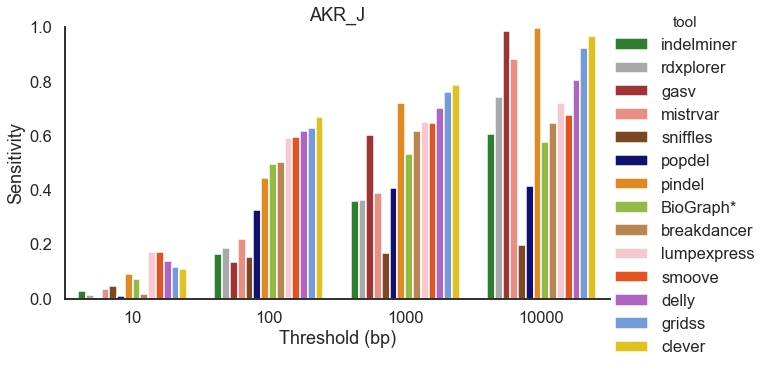

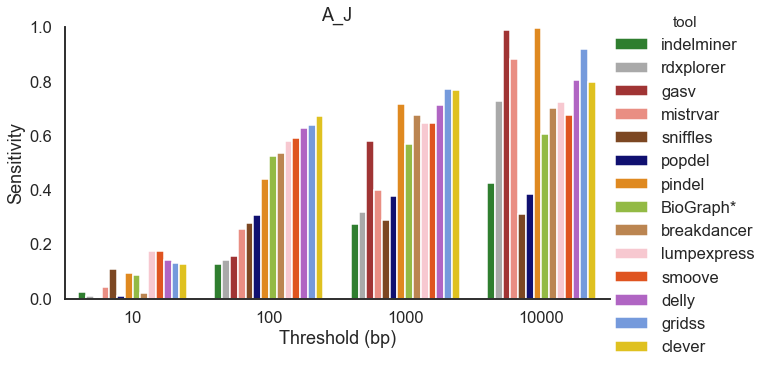

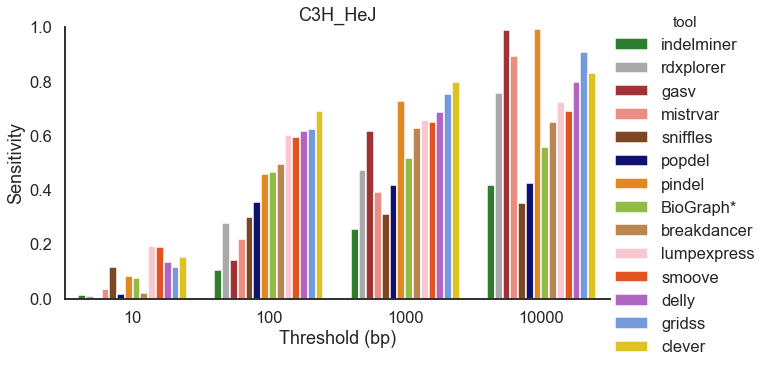

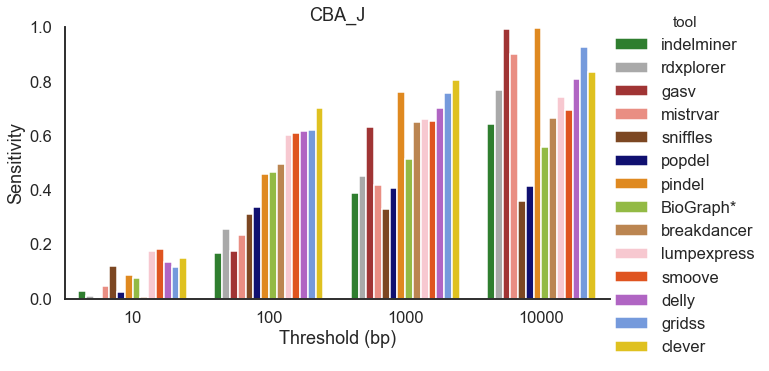

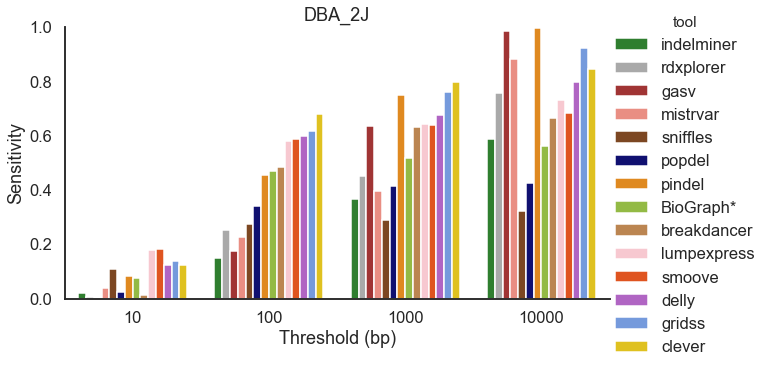

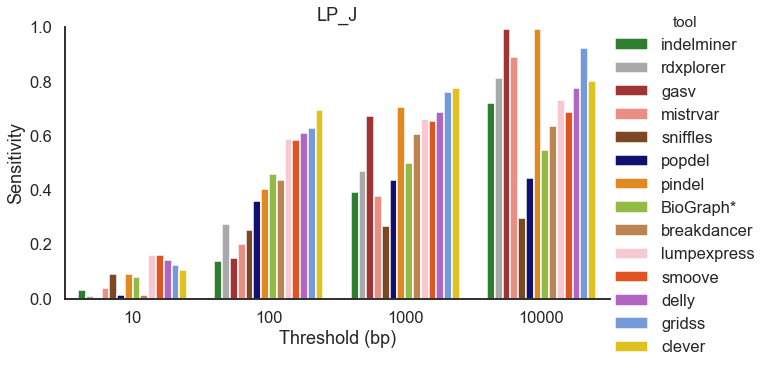

In [10]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['indelminer','rdxplorer','gasv','mistrvar','sniffles','popdel','pindel','BioGraph*','breakdancer','lumpexpress','smoove','delly','gridss','clever']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="sensitivity", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='tool',aspect=1.8,palette=pal, hue_order=fig_order)
    plt.ylim(0, 1)
    plt.title(s)
    fig.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
    g=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/sensitivity_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/sensitivity"+s+".pdf", bbox_inches='tight')

# S5 - Specificity

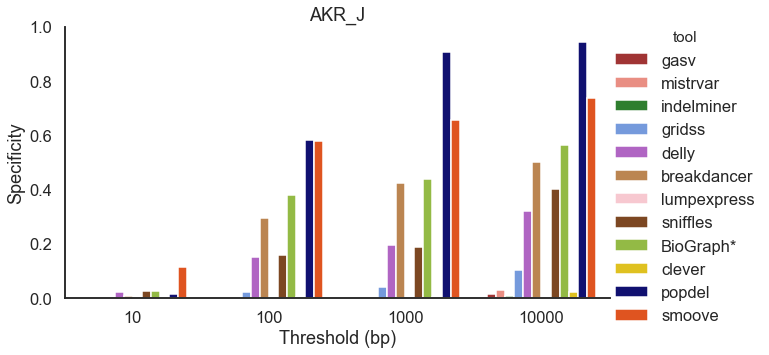

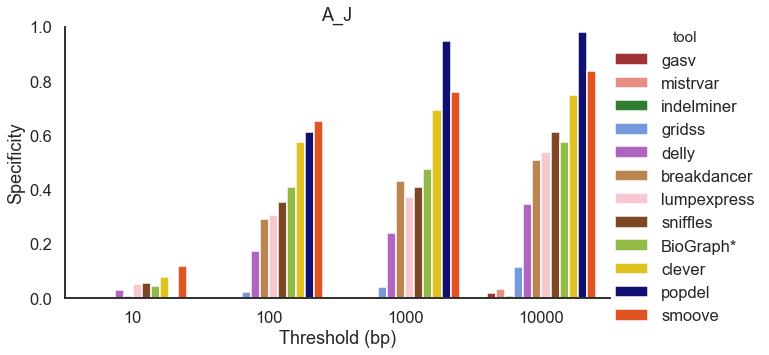

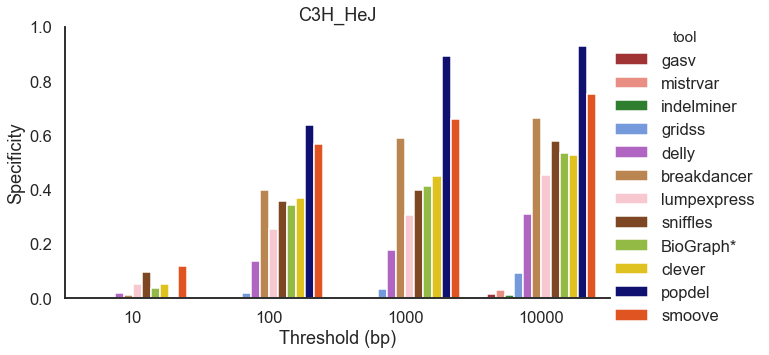

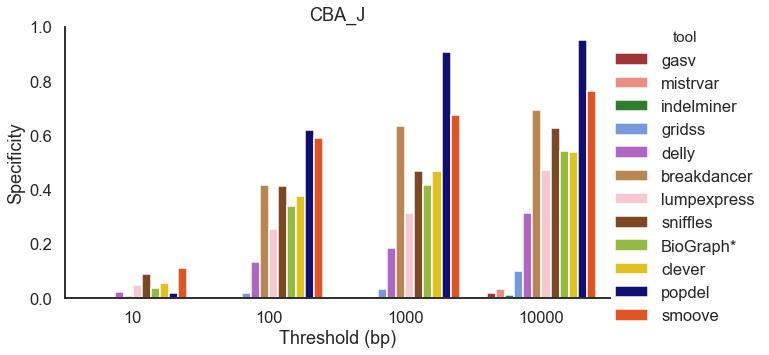

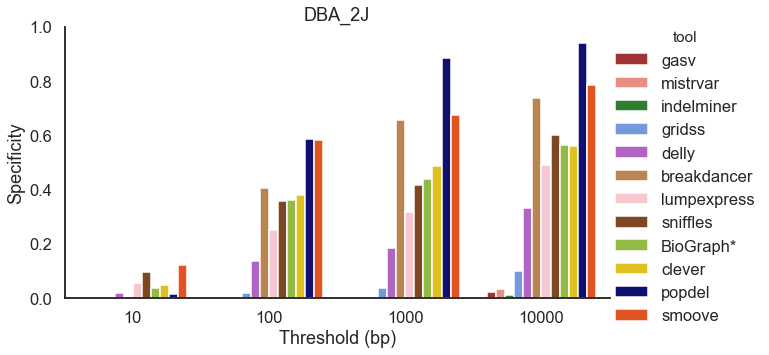

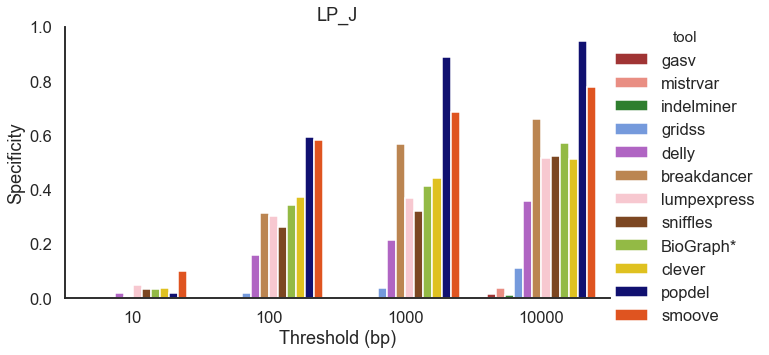

In [12]:
for s in strain:
    fig=sns.set_style("white")
    fig=sns.set_context("talk")
    
    fig_order = ['gasv','mistrvar','indelminer','gridss','delly','breakdancer','lumpexpress','sniffles','BioGraph*','clever','popdel','smoove']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    fig = sns.catplot(x="threshold", y="specificity", kind="bar",data = df_merge.loc[df_merge['strain'] == s],hue='tool',aspect=1.8,palette=pal,hue_order=fig_order)
    plt.title(s)
    plt.ylim(0, 1)
    fig.set(xlabel='Threshold (bp)', ylabel='Specificity')
    fig=sns.despine()
    #plt.show(fig)
    plt.savefig("../figures/supplementary/mouse/specificity_"+s+".png")
    plt.savefig("../figures/supplementary/mouse/specificity_"+s+".pdf", bbox_inches='tight')
    

# S6 Sensitivity x Precision

In [13]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BioGraph*,10,165.714286,42.428571,411.142857,15.428571,542.714286,500.285714,0.078281,0.093773,0.035971,0.085301
1,BioGraph*,100,166.714286,261.000000,192.571429,111.714286,542.714286,281.714286,0.481218,0.576129,0.366554,0.524250
2,BioGraph*,1000,167.714286,286.285714,167.285714,129.714286,542.714286,256.428571,0.527502,0.631530,0.435937,0.574669
3,BioGraph*,10000,168.714286,309.000000,144.571429,184.571429,542.714286,233.714286,0.569452,0.681937,0.561175,0.620445
4,breakdancer,10,169.714286,8.285714,497.714286,4.142857,542.714286,534.428571,0.015434,0.016424,0.008264,0.015859


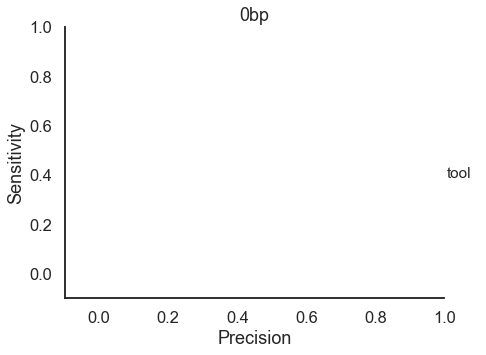

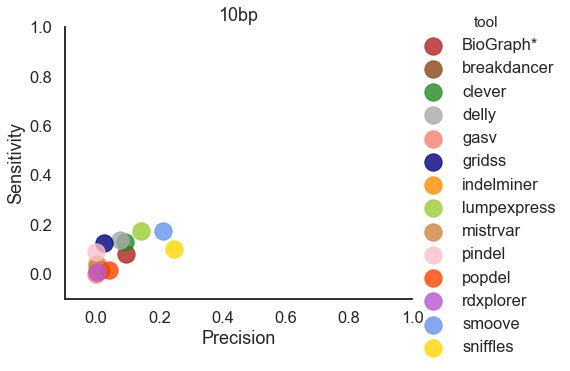

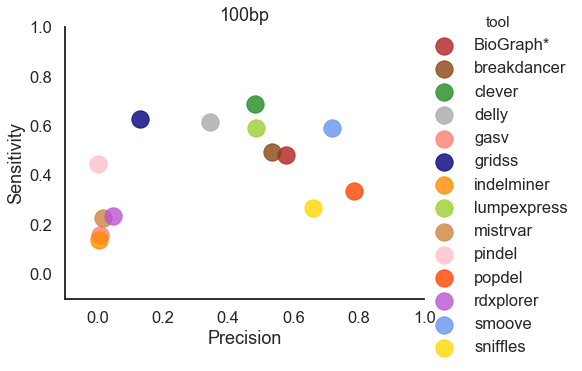

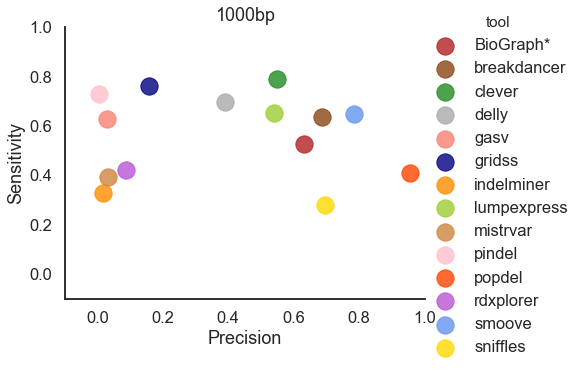

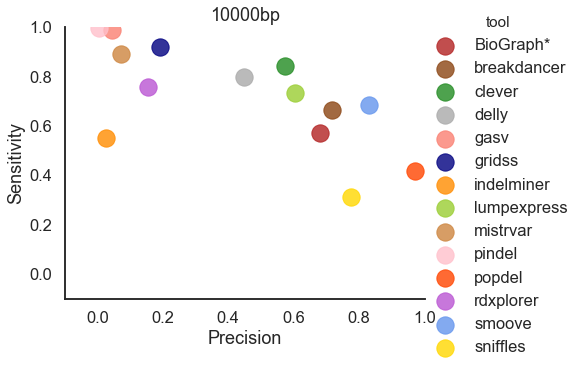

In [14]:
for th in [0,10,100,1000,10000]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    fig_order = ['gasv','sniffles','indelminer','rdxplorer','mistrvar','popdel','pindel','BioGraph*','breakdancer','lumpexpress','smoove','delly','gridss','clever']
    pal = []
    for tool in fig_order:
        pal.append(color_map[tool])
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='tool',fit_reg=False,aspect=1.3,scatter_kws={"s": 300},palette=pal)
    g.set(xlabel='Precision', ylabel='Sensitivity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()
    plt.savefig("../figures/supplementary/mouse/Precision_vs_Sensitivity"+str(th)+"t.png")
    plt.savefig("../figures/supplementary/mouse/Precision_vs_Sensitivity"+str(th)+"t.pdf")